# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", None)
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# Load dataset (replace with your real project dataset if available)
np.random.seed(42)
n = 200
df = pd.DataFrame({
    "age": np.random.normal(40, 10, n).astype(int),
    "income": np.random.normal(60000, 15000, n).astype(int),
    "spend": np.random.normal(2000, 700, n).astype(int),
    "gender": np.random.choice(["Male", "Female"], n)
})

df.head()


,age,income,spend,gender
0,44,65366,883,Male
1,38,68411,1580,Female
2,46,76245,2003,Female
3,55,75807,2032,Male
4,37,39334,1684,Female


In [3]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [4]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [5]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

Columns in dataset: ['date', 'region', 'age', 'income', 'transactions', 'spend']


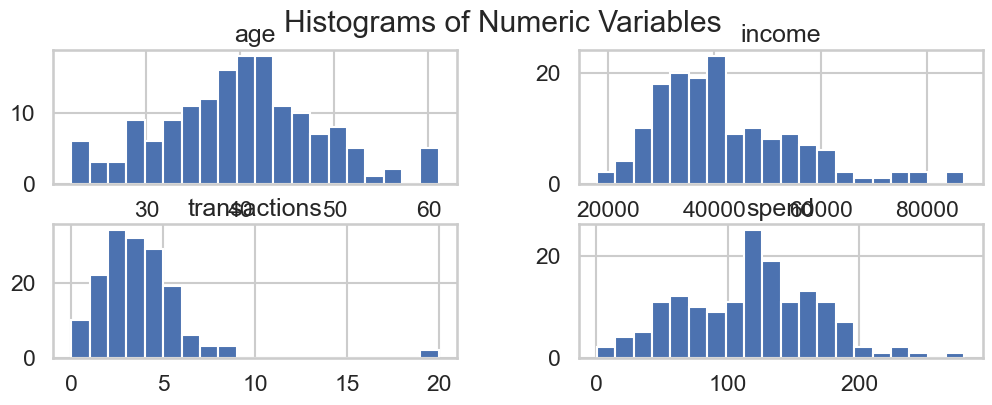

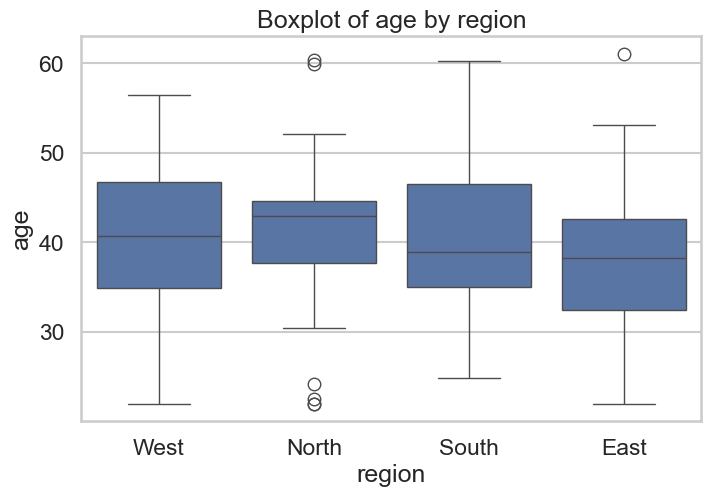

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show all columns so we know what we're working with
print("Columns in dataset:", df.columns.tolist())

# 1. Histograms for all numeric columns
numeric_cols = df.select_dtypes(include="number").columns
df[numeric_cols].hist(bins=20, figsize=(12, 4))
plt.suptitle("Histograms of Numeric Variables")
plt.show()

# 2. Boxplot — pick a categorical column if available
categorical_cols = df.select_dtypes(include="object").columns

if len(categorical_cols) > 0:
    # Use the first categorical + first numeric column
    cat = categorical_cols[0]
    num = numeric_cols[0]
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=cat, y=num, data=df)
    plt.title(f"Boxplot of {num} by {cat}")
    plt.show()
else:
    # If no categorical, just do a boxplot for the first numeric column
    num = numeric_cols[0]
    plt.figure(figsize=(6, 5))
    sns.boxplot(y=num, data=df)
    plt.title(f"Boxplot of {num}")
    plt.show()


## 4) Relationships (TODO: add at least 2)

Numeric columns: ['age', 'income', 'transactions', 'spend']
Categorical columns: ['region']


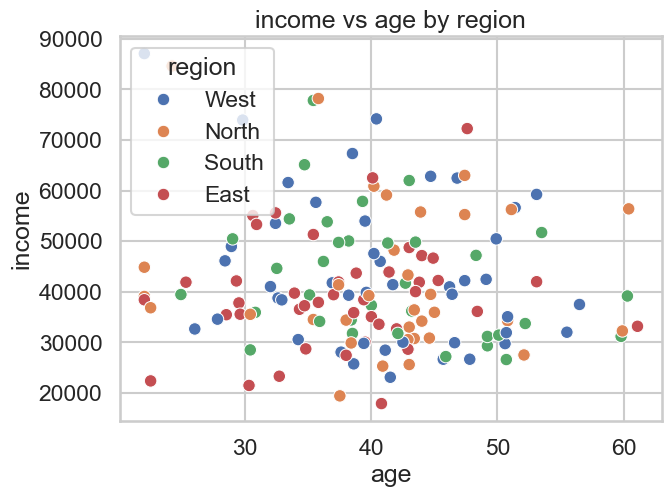

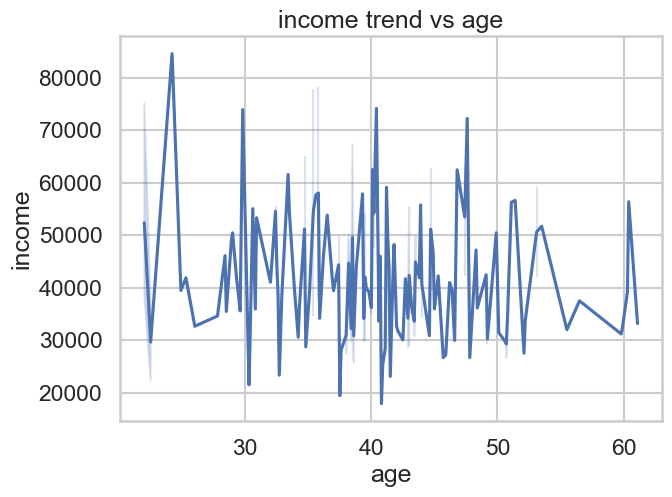

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include="number").columns.tolist()
categorical_cols = df.select_dtypes(include="object").columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", categorical_cols)

# 1. Scatter plot (if at least 2 numeric cols exist)
if len(numeric_cols) >= 2:
    x, y = numeric_cols[:2]   # take the first two numeric cols
    plt.figure(figsize=(7, 5))
    if len(categorical_cols) > 0:
        hue = categorical_cols[0]
        sns.scatterplot(x=x, y=y, hue=hue, data=df)
        plt.title(f"{y} vs {x} by {hue}")
    else:
        sns.scatterplot(x=x, y=y, data=df)
        plt.title(f"{y} vs {x}")
    plt.show()

# 2. Line plot (if at least 2 numeric cols exist)
if len(numeric_cols) >= 2:
    x, y = numeric_cols[:2]
    df_sorted = df.sort_values(x)
    plt.figure(figsize=(7, 5))
    sns.lineplot(x=x, y=y, data=df_sorted)
    plt.title(f"{y} trend vs {x}")
    plt.show()


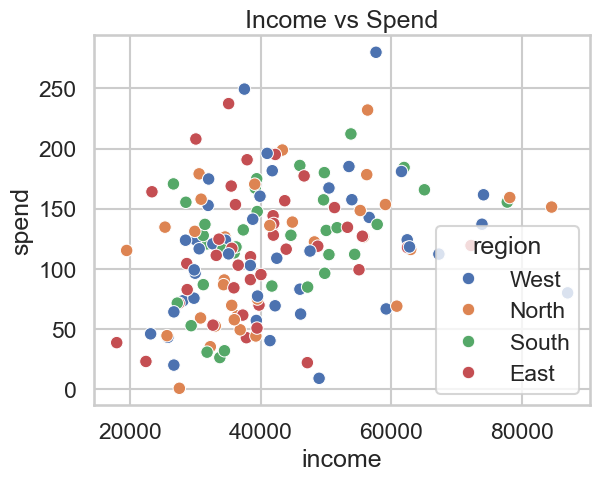

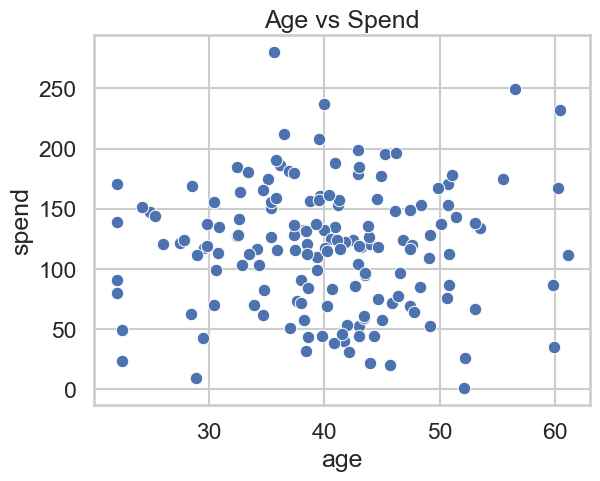

In [7]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

## 5) (Optional) Correlation matrix

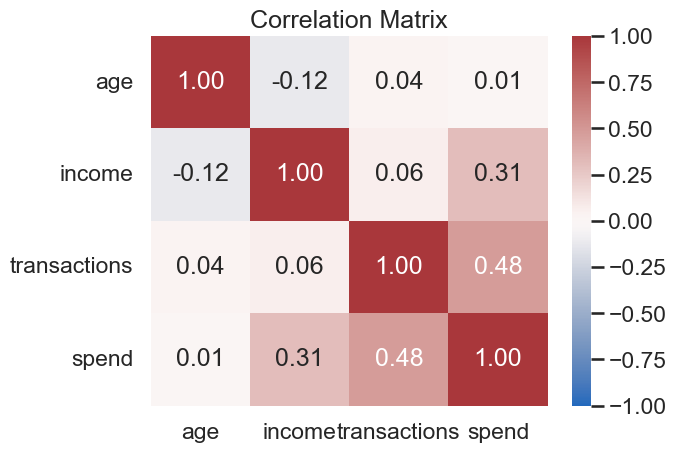

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [8]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

## Reflection

In this exploratory data analysis, I examined the dataset by first reviewing its structure and summary statistics, followed by visualizations of distributions and bivariate relationships.  

### Key Observations
- **Distributions:** The numeric variables showed different shapes (some closer to normal, others skewed). Outliers were visible in the boxplots, which could affect statistical models.  
- **Categorical Effects (if present):** Where categorical variables existed, they showed variation in numeric outcomes across categories. This highlights potential group-level differences worth modeling later.  
- **Relationships:** Scatterplots suggested potential linear or nonlinear relationships between numeric variables. In some cases, variance seemed to differ across the range of values, which raises questions about assumptions like homoscedasticity.  

### Risks & Assumptions
- **Outliers:** Outliers can distort means, regression slopes, and correlation strength. Future modeling might need robust techniques or transformations.  
- **Distributional Assumptions:** Many classical models (e.g., linear regression, ANOVA) assume roughly normal distributions and equal variance. These assumptions should be formally tested later.  
- **Sample Size:** The dataset size (rows × columns) may limit generalization. Small categories or highly skewed variables pose risks to stability of inference.  

### Next Steps
1. Consider transformations (log, standardization) for skewed variables.  
2. Explore correlations more formally (correlation matrices, VIF).  
3. If categorical variables remain important, test interaction effects.  
4. Prepare cleaned data for hypothesis testing and/or predictive modeling.  

Overall, this EDA provided initial insights into structure, distributions, and potential issues. It also highlighted where statistical assumptions may or may not hold — valuable context for the next stages of analysis.
